# carga de datos


In [967]:
#librerias
from carga_datos import cargarDatos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [968]:
#vamos a cargar la base de datos y la vamos a vonvertir en un pandas dataframe

df = cargarDatos()

       tipo_credito      fecha_prestamo  capital_prestado  plazo_meses  \
0                 7 2024-12-21 11:31:35         3692160.0           10   
1                 4 2025-04-22 09:47:35          840000.0            6   
2                 9 2026-01-08 12:22:40         5974028.4           10   
3                 4 2025-08-04 12:04:10         1671240.0            6   
4                 9 2025-04-26 11:24:26         2781636.0           11   
...             ...                 ...               ...          ...   
10758             9 2025-01-19 16:18:28         2414886.0           10   
10759             4 2025-01-10 16:40:21         2916000.0           24   
10760             4 2025-06-19 14:28:47         4249200.0           36   
10761             9 2025-03-02 11:53:41         1283307.6           10   
10762             4 2024-12-08 12:46:03         3915000.0           12   

       edad_cliente   tipo_laboral  salario_cliente  total_otros_prestamos  \
0                42  Independient

Primer vista de los datos

In [969]:
df.head ()

,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,tipo_laboral,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,...,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,tendencia_ingresos,Pago_atiempo
0,7,2024-12-21 11:31:35,3692160.0,10,42,Independiente,8000000,2500000,341296,88.768094,...,0.0,51258.0,51258.0,0.0,5,0,0,908526.0,Estable,1
1,4,2025-04-22 09:47:35,840000.0,6,60,Empleado,3000000,2000000,124876,95.227787,...,0.0,8673.0,8673.0,0.0,0,0,2,939017.0,Creciente,1
2,9,2026-01-08 12:22:40,5974028.4,10,36,Independiente,4036000,829000,529554,47.613894,...,0.0,18702.0,18702.0,0.0,3,0,0,NaN,NaN,0
3,4,2025-08-04 12:04:10,1671240.0,6,48,Empleado,1524547,498000,252420,95.227787,...,0.0,15782.0,15782.0,0.0,3,0,0,1536193.0,Creciente,1
4,9,2025-04-26 11:24:26,2781636.0,11,44,Empleado,5000000,4000000,217037,95.227787,...,0.0,204804.0,204804.0,0.0,3,0,1,933473.0,Creciente,1


In [970]:
#vistazo a los tipos de datos de las columnas
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  int64         
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  object        
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  cant_creditosvi

### Análisis de datos nulos por columna



In [971]:
df.isnull().sum().sort_values(ascending=False)

tendencia_ingresos               2932
promedio_ingresos_datacredito    2930
saldo_mora_codeudor               590
saldo_principal                   405
saldo_mora                        156
saldo_total                       156
puntaje_datacredito                 6
salario_cliente                     0
tipo_laboral                        0
edad_cliente                        0
plazo_meses                         0
capital_prestado                    0
fecha_prestamo                      0
tipo_credito                        0
total_otros_prestamos               0
cant_creditosvigentes               0
huella_consulta                     0
cuota_pactada                       0
puntaje                             0
creditos_sectorCooperativo          0
creditos_sectorFinanciero           0
creditos_sectorReal                 0
Pago_atiempo                        0
dtype: int64

### Análisis de duplicados


In [972]:
df.duplicated().sum()

np.int64(0)

### Primer vista a outliers


In [973]:
df.describe()

,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,puntaje_datacredito,...,huella_consulta,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,Pago_atiempo
count,10763.000000,10763,1.076300e+04,10763.000000,10763.000000,1.076300e+04,1.076300e+04,1.076300e+04,10763.000000,10757.000000,...,10763.000000,10607.000000,1.060700e+04,1.035800e+04,10173.000000,10763.000000,10763.000000,10763.000000,7.833000e+03,10763.000000
mean,5.411131,2025-04-16 23:06:02.111121664,2.434315e+06,10.575583,43.948620,1.721643e+07,6.238870e+06,2.436174e+05,91.170036,780.790834,...,4.228561,7.746017,4.593741e+04,4.034617e+04,0.260002,2.779987,0.269813,1.302704,2.005157e+06,0.952523
min,4.000000,2024-11-26 09:17:04,3.600000e+05,2.000000,19.000000,0.000000e+00,0.000000e+00,2.394400e+04,-38.009990,-7.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,4.000000,2025-01-20 17:33:07.500000,1.224831e+06,6.000000,33.000000,2.000000e+06,5.000000e+05,1.210415e+05,95.227787,757.000000,...,2.000000,0.000000,2.898000e+03,2.690000e+03,0.000000,1.000000,0.000000,0.000000,9.251570e+05,1.000000
50%,4.000000,2025-03-27 16:23:12,1.921920e+06,10.000000,42.000000,3.000000e+06,1.000000e+06,1.828630e+05,95.227787,791.000000,...,4.000000,0.000000,1.617800e+04,1.444250e+04,0.000000,2.000000,0.000000,1.000000,1.204496e+06,1.000000
75%,9.000000,2025-06-16 13:27:58,3.084840e+06,12.000000,53.000000,4.875808e+06,2.000000e+06,2.878335e+05,95.227787,825.000000,...,6.000000,0.000000,5.298200e+04,4.763225e+04,0.000000,4.000000,0.000000,2.000000,2.231859e+06,1.000000
max,68.000000,2026-04-26 18:43:52,4.144415e+07,90.000000,123.000000,2.200000e+10,6.787675e+09,3.816752e+06,95.227787,999.000000,...,29.000000,12534.000000,5.116066e+06,1.562285e+06,2145.000000,51.000000,13.000000,25.000000,3.810658e+07,1.000000
std,2.338279,NaN,1.909643e+06,6.632082,15.060877,3.554767e+08,1.184183e+08,2.104937e+05,16.465441,104.878031,...,3.064683,225.955117,1.062698e+05,7.124244e+04,21.772917,2.748807,0.716471,1.824430,2.144116e+06,0.212668


In [974]:
df.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,puntaje_datacredito,...,huella_consulta,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,Pago_atiempo
count,10763.000000,10763,1.076300e+04,10763.000000,10763.000000,1.076300e+04,1.076300e+04,1.076300e+04,10763.000000,10757.000000,...,10763.000000,10607.000000,1.060700e+04,1.035800e+04,10173.000000,10763.000000,10763.000000,10763.000000,7.833000e+03,10763.000000
mean,5.411131,2025-04-16 23:06:02.111121664,2.434315e+06,10.575583,43.948620,1.721643e+07,6.238870e+06,2.436174e+05,91.170036,780.790834,...,4.228561,7.746017,4.593741e+04,4.034617e+04,0.260002,2.779987,0.269813,1.302704,2.005157e+06,0.952523
min,4.000000,2024-11-26 09:17:04,3.600000e+05,2.000000,19.000000,0.000000e+00,0.000000e+00,2.394400e+04,-38.009990,-7.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,4.000000,2025-01-20 17:33:07.500000,1.224831e+06,6.000000,33.000000,2.000000e+06,5.000000e+05,1.210415e+05,95.227787,757.000000,...,2.000000,0.000000,2.898000e+03,2.690000e+03,0.000000,1.000000,0.000000,0.000000,9.251570e+05,1.000000
50%,4.000000,2025-03-27 16:23:12,1.921920e+06,10.000000,42.000000,3.000000e+06,1.000000e+06,1.828630e+05,95.227787,791.000000,...,4.000000,0.000000,1.617800e+04,1.444250e+04,0.000000,2.000000,0.000000,1.000000,1.204496e+06,1.000000
75%,9.000000,2025-06-16 13:27:58,3.084840e+06,12.000000,53.000000,4.875808e+06,2.000000e+06,2.878335e+05,95.227787,825.000000,...,6.000000,0.000000,5.298200e+04,4.763225e+04,0.000000,4.000000,0.000000,2.000000,2.231859e+06,1.000000
90%,9.000000,2025-09-09 16:07:47.400000,4.454400e+06,18.000000,61.000000,7.500000e+06,3.000000e+06,4.703384e+05,95.227787,856.000000,...,8.000000,0.000000,1.196842e+05,1.081905e+05,0.000000,6.000000,1.000000,3.000000,4.191158e+06,1.000000
95%,9.000000,2025-11-09 12:57:49.900000,5.938828e+06,24.000000,65.000000,1.000000e+07,4.798900e+06,6.103953e+05,95.227787,873.000000,...,10.000000,0.000000,1.860587e+05,1.670376e+05,0.000000,7.000000,2.000000,5.000000,5.972734e+06,1.000000
99%,10.000000,2026-02-07 01:37:27.300000,8.881110e+06,36.000000,122.000000,3.955356e+07,1.794606e+07,1.114004e+06,95.227787,900.000000,...,15.000000,0.000000,3.672953e+05,3.257119e+05,0.000000,12.000000,3.000000,8.000000,1.079923e+07,1.000000
max,68.000000,2026-04-26 18:43:52,4.144415e+07,90.000000,123.000000,2.200000e+10,6.787675e+09,3.816752e+06,95.227787,999.000000,...,29.000000,12534.000000,5.116066e+06,1.562285e+06,2145.000000,51.000000,13.000000,25.000000,3.810658e+07,1.000000


### Análisis de datos en la columna Tendencias ingresos


In [975]:
df['tendencia_ingresos'].unique()

array(['Estable', 'Creciente', nan, 'Decreciente', 8315, 0, 158042, 3978,
       9147, 168750, -28589, 1000000, -566272, 24702, 31837, 122727,
       417087, 9090, 173031, -70715, -435177, -702927, -4105, 54683,
       22832, 209090, 5697, 10808, -288, -164315, 2029000, 17181, 15245,
       82657, 52862, 1817052, 75761, 146918, 1123000, 15090, 4250635,
       22363, -101368, 86286, 65988, 77975, -224714], dtype=object)

In [976]:
# Lista de valores categóricos permitidos
valores_validos = ["Estable", "Creciente", "Decreciente"]

# Mantener solo valores válidos; reemplazar el resto por NaN
df["tendencia_ingresos"] = df["tendencia_ingresos"].where(
    df["tendencia_ingresos"].isin(valores_validos),np.nan)

# Reemplazar NaN con la moda de la columna
moda = df["tendencia_ingresos"].mode()[0]
df["tendencia_ingresos"].fillna(moda, inplace=True)


C:\Users\Davem\AppData\Local\Temp\ipykernel_18576\1164634633.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["tendencia_ingresos"].fillna(moda, inplace=True)


In [977]:
df['tendencia_ingresos'].unique()

array(['Estable', 'Creciente', 'Decreciente'], dtype=object)

In [978]:
df.isnull().sum().sort_values(ascending=False)

promedio_ingresos_datacredito    2930
saldo_mora_codeudor               590
saldo_principal                   405
saldo_mora                        156
saldo_total                       156
puntaje_datacredito                 6
tipo_credito                        0
salario_cliente                     0
tipo_laboral                        0
edad_cliente                        0
plazo_meses                         0
capital_prestado                    0
fecha_prestamo                      0
puntaje                             0
total_otros_prestamos               0
cant_creditosvigentes               0
huella_consulta                     0
cuota_pactada                       0
creditos_sectorFinanciero           0
creditos_sectorCooperativo          0
creditos_sectorReal                 0
tendencia_ingresos                  0
Pago_atiempo                        0
dtype: int64

### Análisis de datos y limpieza en la columna promedio ingresos datacredito


In [979]:
df.promedio_ingresos_datacredito.sort_values(ascending=True)


10419    0.0
3307     0.0
10322    0.0
2983     0.0
4078     0.0
        ... 
10740    NaN
10754    NaN
10758    NaN
10761    NaN
10762    NaN
Name: promedio_ingresos_datacredito, Length: 10763, dtype: float64

In [980]:
df.promedio_ingresos_datacredito.describe()

count    7.833000e+03
mean     2.005157e+06
std      2.144116e+06
min      0.000000e+00
25%      9.251570e+05
50%      1.204496e+06
75%      2.231859e+06
max      3.810658e+07
Name: promedio_ingresos_datacredito, dtype: float64

In [981]:
# Convertir los ceros a NaN
df["promedio_ingresos_datacredito"] = df["promedio_ingresos_datacredito"].replace(0, np.nan)

# Reemplazar NaN con la mediana
mediana = df["promedio_ingresos_datacredito"].median()
df["promedio_ingresos_datacredito"].fillna(mediana, inplace=True)

C:\Users\Davem\AppData\Local\Temp\ipykernel_18576\2311152670.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["promedio_ingresos_datacredito"].fillna(mediana, inplace=True)


In [982]:
df.promedio_ingresos_datacredito.sort_values(ascending=True)


372         1000.0
4680        4263.0
342        29261.0
6528       30285.0
2575       30285.0
           ...    
617     24047145.0
4624    24376313.0
440     28878675.0
9       28889623.0
7734    38106581.0
Name: promedio_ingresos_datacredito, Length: 10763, dtype: float64

In [983]:
df.isnull().sum().sort_values(ascending=False)

saldo_mora_codeudor              590
saldo_principal                  405
saldo_mora                       156
saldo_total                      156
puntaje_datacredito                6
fecha_prestamo                     0
tipo_credito                       0
salario_cliente                    0
tipo_laboral                       0
edad_cliente                       0
plazo_meses                        0
capital_prestado                   0
cuota_pactada                      0
puntaje                            0
total_otros_prestamos              0
cant_creditosvigentes              0
huella_consulta                    0
creditos_sectorFinanciero          0
creditos_sectorCooperativo         0
creditos_sectorReal                0
promedio_ingresos_datacredito      0
tendencia_ingresos                 0
Pago_atiempo                       0
dtype: int64

### Análisis de datos y limpieza en columna saldo mora codeudo


In [984]:
df.saldo_mora_codeudor.describe()


count    10173.000000
mean         0.260002
std         21.772917
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2145.000000
Name: saldo_mora_codeudor, dtype: float64

In [985]:
df["saldo_mora_codeudor"].describe(percentiles=[.90, .95, .99])


count    10173.000000
mean         0.260002
std         21.772917
min          0.000000
50%          0.000000
90%          0.000000
95%          0.000000
99%          0.000000
max       2145.000000
Name: saldo_mora_codeudor, dtype: float64

In [986]:
# Reemplazar NaN con 0.0
df["saldo_mora_codeudor"].fillna(0, inplace=True)

C:\Users\Davem\AppData\Local\Temp\ipykernel_18576\3414468218.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["saldo_mora_codeudor"].fillna(0, inplace=True)


In [987]:
df.isnull().sum().sort_values(ascending=False)

saldo_principal                  405
saldo_mora                       156
saldo_total                      156
puntaje_datacredito                6
tipo_credito                       0
fecha_prestamo                     0
capital_prestado                   0
salario_cliente                    0
tipo_laboral                       0
edad_cliente                       0
plazo_meses                        0
puntaje                            0
cuota_pactada                      0
huella_consulta                    0
total_otros_prestamos              0
cant_creditosvigentes              0
saldo_mora_codeudor                0
creditos_sectorFinanciero          0
creditos_sectorCooperativo         0
creditos_sectorReal                0
promedio_ingresos_datacredito      0
tendencia_ingresos                 0
Pago_atiempo                       0
dtype: int64

### Análisis de datos y limpieza en columna saldo principal


In [988]:
df.saldo_principal.describe()


count    1.035800e+04
mean     4.034617e+04
std      7.124244e+04
min      0.000000e+00
25%      2.690000e+03
50%      1.444250e+04
75%      4.763225e+04
max      1.562285e+06
Name: saldo_principal, dtype: float64

In [989]:
df["saldo_principal"].describe(percentiles=[.90, .95, .99])


count    1.035800e+04
mean     4.034617e+04
std      7.124244e+04
min      0.000000e+00
50%      1.444250e+04
90%      1.081905e+05
95%      1.670376e+05
99%      3.257119e+05
max      1.562285e+06
Name: saldo_principal, dtype: float64

In [990]:
# Reemplazar NaN por 0
df["saldo_principal"] = df["saldo_principal"].fillna(0)


In [991]:
df.isnull().sum().sort_values(ascending=False)

saldo_mora                       156
saldo_total                      156
puntaje_datacredito                6
plazo_meses                        0
tipo_credito                       0
fecha_prestamo                     0
capital_prestado                   0
salario_cliente                    0
tipo_laboral                       0
edad_cliente                       0
total_otros_prestamos              0
puntaje                            0
cuota_pactada                      0
huella_consulta                    0
cant_creditosvigentes              0
saldo_principal                    0
saldo_mora_codeudor                0
creditos_sectorFinanciero          0
creditos_sectorCooperativo         0
creditos_sectorReal                0
promedio_ingresos_datacredito      0
tendencia_ingresos                 0
Pago_atiempo                       0
dtype: int64

### Análisis de datos y limpieza en columna saldo mora


In [992]:
df.saldo_mora.describe()


count    10607.000000
mean         7.746017
std        225.955117
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      12534.000000
Name: saldo_mora, dtype: float64

In [993]:
df["saldo_mora"].describe(percentiles=[.90, .95, .99])


count    10607.000000
mean         7.746017
std        225.955117
min          0.000000
50%          0.000000
90%          0.000000
95%          0.000000
99%          0.000000
max      12534.000000
Name: saldo_mora, dtype: float64

In [994]:

# Reemplazar NaN por 0
df["saldo_mora"] = df["saldo_mora"].fillna(0)

In [995]:
df.isnull().sum().sort_values(ascending=False)

saldo_total                      156
puntaje_datacredito                6
tipo_credito                       0
plazo_meses                        0
edad_cliente                       0
fecha_prestamo                     0
capital_prestado                   0
salario_cliente                    0
tipo_laboral                       0
cuota_pactada                      0
total_otros_prestamos              0
puntaje                            0
cant_creditosvigentes              0
huella_consulta                    0
saldo_mora                         0
saldo_principal                    0
saldo_mora_codeudor                0
creditos_sectorFinanciero          0
creditos_sectorCooperativo         0
creditos_sectorReal                0
promedio_ingresos_datacredito      0
tendencia_ingresos                 0
Pago_atiempo                       0
dtype: int64

### Análisis de datos y limpieza en columna saldo total


In [996]:
df["saldo_total"].describe()

count    1.060700e+04
mean     4.593741e+04
std      1.062698e+05
min      0.000000e+00
25%      2.898000e+03
50%      1.617800e+04
75%      5.298200e+04
max      5.116066e+06
Name: saldo_total, dtype: float64

In [997]:
df["saldo_total"].describe(percentiles=[.90, .95, .99])


count    1.060700e+04
mean     4.593741e+04
std      1.062698e+05
min      0.000000e+00
50%      1.617800e+04
90%      1.196842e+05
95%      1.860587e+05
99%      3.672953e+05
max      5.116066e+06
Name: saldo_total, dtype: float64

In [998]:
# Reemplazar NaN por 0
df["saldo_total"] = df["saldo_total"].fillna(0)

In [999]:
df.isnull().sum().sort_values(ascending=False)

puntaje_datacredito              6
fecha_prestamo                   0
tipo_credito                     0
plazo_meses                      0
edad_cliente                     0
tipo_laboral                     0
capital_prestado                 0
salario_cliente                  0
total_otros_prestamos            0
cuota_pactada                    0
puntaje                          0
cant_creditosvigentes            0
huella_consulta                  0
saldo_mora                       0
saldo_total                      0
saldo_principal                  0
saldo_mora_codeudor              0
creditos_sectorFinanciero        0
creditos_sectorCooperativo       0
creditos_sectorReal              0
promedio_ingresos_datacredito    0
tendencia_ingresos               0
Pago_atiempo                     0
dtype: int64

### Análisis de datos y limpieza en columna puntaje datacredito


In [1000]:
df.puntaje_datacredito.describe()


count    10757.000000
mean       780.790834
std        104.878031
min         -7.000000
25%        757.000000
50%        791.000000
75%        825.000000
max        999.000000
Name: puntaje_datacredito, dtype: float64

In [1001]:
df.puntaje_datacredito.describe(percentiles=[.90, .95, .99])


count    10757.000000
mean       780.790834
std        104.878031
min         -7.000000
50%        791.000000
90%        856.000000
95%        873.000000
99%        900.000000
max        999.000000
Name: puntaje_datacredito, dtype: float64

In [1002]:
#reemplazar valores menores a 0 por NaN
df.loc[df["puntaje_datacredito"] < 0, "puntaje_datacredito"] = np.nan

mediana_puntaje = df["puntaje_datacredito"].median()

df["puntaje_datacredito"] = df["puntaje_datacredito"].fillna(mediana_puntaje)


In [1003]:
df.puntaje_datacredito.sort_values(ascending=True)


7150      0.0
7157      0.0
7156      0.0
7155      0.0
7154      0.0
        ...  
8586    968.0
1765    969.0
7622    978.0
3772    987.0
1503    999.0
Name: puntaje_datacredito, Length: 10763, dtype: float64

### confirmo eliminacion de nulos y outliers en las columnas anteriores


In [1004]:
df.isnull().sum().sort_values(ascending=False)

tipo_credito                     0
fecha_prestamo                   0
capital_prestado                 0
plazo_meses                      0
edad_cliente                     0
tipo_laboral                     0
salario_cliente                  0
total_otros_prestamos            0
cuota_pactada                    0
puntaje                          0
puntaje_datacredito              0
cant_creditosvigentes            0
huella_consulta                  0
saldo_mora                       0
saldo_total                      0
saldo_principal                  0
saldo_mora_codeudor              0
creditos_sectorFinanciero        0
creditos_sectorCooperativo       0
creditos_sectorReal              0
promedio_ingresos_datacredito    0
tendencia_ingresos               0
Pago_atiempo                     0
dtype: int64

In [1005]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  int64         
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  object        
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10763 non-null  float64       
 11  cant_creditosvi

In [1006]:
df.edad_cliente.sort_values(ascending=False)


7113    123
7032    123
7152    122
7153    122
7151    122
       ... 
1087     20
732      20
7336     20
7338     20
6321     19
Name: edad_cliente, Length: 10763, dtype: int64

### Ajusto un limite de edad realista


In [1007]:
df.loc[
    (df["edad_cliente"] < 18) | (df["edad_cliente"] > 70),
    "edad_cliente"
] = np.nan

In [1008]:
media_edad = df["edad_cliente"].mean()


In [1009]:
df["edad_cliente"] = df["edad_cliente"].fillna(media_edad)


In [1010]:
df["edad_cliente"].describe()


count    10763.000000
mean        42.845661
std         11.863754
min         19.000000
25%         33.000000
50%         42.000000
75%         52.000000
max         69.000000
Name: edad_cliente, dtype: float64

### Análisis de datos y limpieza en columna salario cliente


In [1011]:
df.salario_cliente.sort_values(ascending=False)


5735     22000000000
2866     16991100000
7014     13258352050
7043     12450806583
7041      8252584000
            ...     
10360              0
320                0
10309              0
2864               0
1057               0
Name: salario_cliente, Length: 10763, dtype: int64

In [1012]:
df.loc[df["salario_cliente"] == 0, "salario_cliente"] = np.nan

In [1013]:
df["salario_cliente"].describe(percentiles=[.90, .95, .99])


count    1.073900e+04
mean     1.725491e+07
std      3.558728e+08
min      1.000000e+03
50%      3.000000e+06
90%      7.500000e+06
95%      1.000000e+07
99%      3.972638e+07
max      2.200000e+10
Name: salario_cliente, dtype: float64

In [1014]:
##Límite superior con P99
p99 = df["salario_cliente"].quantile(0.99)

##Outliers extremos a nulo
df.loc[
    df["salario_cliente"] > p99,
    "salario_cliente"
] = np.nan

##Imputar con mediana
mediana = df["salario_cliente"].median()
df["salario_cliente"] = df["salario_cliente"].fillna(mediana)

##Variable log
df["salario_cliente_log"] = np.log1p(df["salario_cliente"])




In [1015]:

df["salario_cliente"].describe()

count    1.076300e+04
mean     3.904799e+06
std      3.522862e+06
min      1.000000e+03
25%      2.000000e+06
50%      3.000000e+06
75%      4.613000e+06
max      3.927994e+07
Name: salario_cliente, dtype: float64

In [1016]:
df.describe()

,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,puntaje_datacredito,...,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,Pago_atiempo,salario_cliente_log
count,10763.000000,10763,1.076300e+04,10763.000000,10763.000000,1.076300e+04,1.076300e+04,1.076300e+04,10763.000000,10763.000000,...,10763.000000,1.076300e+04,1.076300e+04,10763.000000,10763.000000,10763.000000,10763.000000,1.076300e+04,10763.000000,10763.000000
mean,5.411131,2025-04-16 23:06:02.111121664,2.434315e+06,10.575583,42.845661,3.904799e+06,6.238870e+06,2.436174e+05,91.170036,780.870668,...,7.633745,4.527159e+04,3.882799e+04,0.245749,2.779987,0.269813,1.302704,1.788224e+06,0.952523,14.945534
min,4.000000,2024-11-26 09:17:04,3.600000e+05,2.000000,19.000000,1.000000e+03,0.000000e+00,2.394400e+04,-38.009990,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000e+03,0.000000,6.908755
25%,4.000000,2025-01-20 17:33:07.500000,1.224831e+06,6.000000,33.000000,2.000000e+06,5.000000e+05,1.210415e+05,95.227787,757.000000,...,0.000000,2.570000e+03,2.008000e+03,0.000000,1.000000,0.000000,0.000000,9.618855e+05,1.000000,14.508658
50%,4.000000,2025-03-27 16:23:12,1.921920e+06,10.000000,42.000000,3.000000e+06,1.000000e+06,1.828630e+05,95.227787,791.000000,...,0.000000,1.558100e+04,1.302600e+04,0.000000,2.000000,0.000000,1.000000,1.205401e+06,1.000000,14.914123
75%,9.000000,2025-06-16 13:27:58,3.084840e+06,12.000000,52.000000,4.613000e+06,2.000000e+06,2.878335e+05,95.227787,825.000000,...,0.000000,5.215600e+04,4.529700e+04,0.000000,4.000000,0.000000,2.000000,1.705770e+06,1.000000,15.344389
max,68.000000,2026-04-26 18:43:52,4.144415e+07,90.000000,69.000000,3.927994e+07,6.787675e+09,3.816752e+06,95.227787,999.000000,...,12534.000000,5.116066e+06,1.562285e+06,2145.000000,51.000000,13.000000,25.000000,3.810658e+07,1.000000,17.486225
std,2.338279,NaN,1.909643e+06,6.632082,11.863754,3.522862e+06,1.184183e+08,2.104937e+05,16.465441,104.573722,...,224.313390,1.056395e+05,7.030957e+04,21.167764,2.748807,0.716471,1.824430,1.862925e+06,0.212668,0.646471


In [1017]:
df.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,puntaje_datacredito,...,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,Pago_atiempo,salario_cliente_log
count,10763.000000,10763,1.076300e+04,10763.000000,10763.000000,1.076300e+04,1.076300e+04,1.076300e+04,10763.000000,10763.000000,...,10763.000000,1.076300e+04,1.076300e+04,10763.000000,10763.000000,10763.000000,10763.000000,1.076300e+04,10763.000000,10763.000000
mean,5.411131,2025-04-16 23:06:02.111121664,2.434315e+06,10.575583,42.845661,3.904799e+06,6.238870e+06,2.436174e+05,91.170036,780.870668,...,7.633745,4.527159e+04,3.882799e+04,0.245749,2.779987,0.269813,1.302704,1.788224e+06,0.952523,14.945534
min,4.000000,2024-11-26 09:17:04,3.600000e+05,2.000000,19.000000,1.000000e+03,0.000000e+00,2.394400e+04,-38.009990,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000e+03,0.000000,6.908755
25%,4.000000,2025-01-20 17:33:07.500000,1.224831e+06,6.000000,33.000000,2.000000e+06,5.000000e+05,1.210415e+05,95.227787,757.000000,...,0.000000,2.570000e+03,2.008000e+03,0.000000,1.000000,0.000000,0.000000,9.618855e+05,1.000000,14.508658
50%,4.000000,2025-03-27 16:23:12,1.921920e+06,10.000000,42.000000,3.000000e+06,1.000000e+06,1.828630e+05,95.227787,791.000000,...,0.000000,1.558100e+04,1.302600e+04,0.000000,2.000000,0.000000,1.000000,1.205401e+06,1.000000,14.914123
75%,9.000000,2025-06-16 13:27:58,3.084840e+06,12.000000,52.000000,4.613000e+06,2.000000e+06,2.878335e+05,95.227787,825.000000,...,0.000000,5.215600e+04,4.529700e+04,0.000000,4.000000,0.000000,2.000000,1.705770e+06,1.000000,15.344389
90%,9.000000,2025-09-09 16:07:47.400000,4.454400e+06,18.000000,60.000000,7.000000e+06,3.000000e+06,4.703384e+05,95.227787,856.000000,...,0.000000,1.185882e+05,1.049028e+05,0.000000,6.000000,1.000000,3.000000,3.475349e+06,1.000000,15.761421
95%,9.000000,2025-11-09 12:57:49.900000,5.938828e+06,24.000000,64.000000,1.000000e+07,4.798900e+06,6.103953e+05,95.227787,872.900000,...,0.000000,1.852988e+05,1.635110e+05,0.000000,7.000000,2.000000,5.000000,5.141286e+06,1.000000,16.118096
99%,10.000000,2026-02-07 01:37:27.300000,8.881110e+06,36.000000,68.000000,2.000000e+07,1.794606e+07,1.114004e+06,95.227787,900.000000,...,0.000000,3.659024e+05,3.243710e+05,0.000000,12.000000,3.000000,8.000000,9.443046e+06,1.000000,16.811243
max,68.000000,2026-04-26 18:43:52,4.144415e+07,90.000000,69.000000,3.927994e+07,6.787675e+09,3.816752e+06,95.227787,999.000000,...,12534.000000,5.116066e+06,1.562285e+06,2145.000000,51.000000,13.000000,25.000000,3.810658e+07,1.000000,17.486225


### Total de otros préstamos

La variable presenta una fuerte asimetría positiva, con valores extremos muy
superiores al comportamiento del 99% de los registros.

Dado que estos valores pueden representar clientes con alta exposición crediticia
(real y relevante para el análisis), no se eliminan ni se imputan.
Para evitar distorsión en el análisis descriptivo y visual, se decide:

- Limitar los valores al percentil 99
- Crear una transformación logarítmica de la variable



In [1018]:
df.total_otros_prestamos.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    1.076300e+04
mean     6.238870e+06
std      1.184183e+08
min      0.000000e+00
25%      5.000000e+05
50%      1.000000e+06
75%      2.000000e+06
90%      3.000000e+06
95%      4.798900e+06
99%      1.794606e+07
max      6.787675e+09
Name: total_otros_prestamos, dtype: float64

In [1019]:
# Límite superior (cap) al percentil 99
p99_total_otros = df["total_otros_prestamos"].quantile(0.99)
df["total_otros_prestamos"] = df["total_otros_prestamos"].clip(upper=p99_total_otros)

# Transformación logarítmica
df["total_otros_prestamos_log"] = np.log1p(df["total_otros_prestamos"])


In [1020]:
df.total_otros_prestamos.describe(percentiles=[0.90, 0.95, 0.99])

count    1.076300e+04
mean     1.598662e+06
std      2.322896e+06
min      0.000000e+00
50%      1.000000e+06
90%      3.000000e+06
95%      4.798900e+06
99%      1.792556e+07
max      1.794606e+07
Name: total_otros_prestamos, dtype: float64

### Puntaje

La variable presenta una concentración casi total en un único valor,
lo que indica una variable con muy baja variabilidad.

Se identificaron valores negativos que no son válidos dentro de la lógica
del puntaje, por lo que se consideran errores de datos.

Dado que la mayoría de los registros comparten el mismo valor,
se decide:
- Convertir los valores negativos a nulos
- Imputar los valores faltantes con la mediana


In [1021]:
df.puntaje.sort_values(ascending=True)


1214    -38.009990
10701   -25.210766
7278    -24.036161
1426    -21.864297
1639    -21.099465
           ...    
6        95.227787
5        95.227787
4        95.227787
3        95.227787
1        95.227787
Name: puntaje, Length: 10763, dtype: float64

In [1022]:
df.puntaje.describe()


count    10763.000000
mean        91.170036
std         16.465441
min        -38.009990
25%         95.227787
50%         95.227787
75%         95.227787
max         95.227787
Name: puntaje, dtype: float64

In [1023]:
# Convertir valores negativos a nulo
df.loc[df["puntaje"] < 0, "puntaje"] = np.nan

# Imputar con la mediana (valor dominante)
df["puntaje"] = df["puntaje"].fillna(df["puntaje"].median())


In [1024]:
df.puntaje.describe()


count    10763.000000
mean        92.502146
std         11.752393
min          0.050943
25%         95.227787
50%         95.227787
75%         95.227787
max         95.227787
Name: puntaje, dtype: float64

### Cantidad de créditos vigentes

La variable presenta un comportamiento discreto con la mayoría de los registros
concentrados en valores bajos.

Se identifican algunos casos extremos con un número muy elevado de créditos
vigentes respecto al comportamiento general.

Dado que estos valores pueden existir, pero afectan la interpretación visual,
se decide limitar los valores extremos utilizando el percentil 99.


In [1025]:
df.cant_creditosvigentes.describe(percentiles=[.90, .95, .99])

count    10763.000000
mean         5.726749
std          3.977162
min          0.000000
50%          5.000000
90%         11.000000
95%         13.000000
99%         19.000000
max         62.000000
Name: cant_creditosvigentes, dtype: float64

In [1026]:
# Cap al percentil 99
p99_creditos = df["cant_creditosvigentes"].quantile(0.99)
df["cant_creditosvigentes"] = df["cant_creditosvigentes"].clip(upper=p99_creditos)


In [1027]:
df.cant_creditosvigentes.describe()

count    10763.000000
mean         5.676670
std          3.731297
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         19.000000
Name: cant_creditosvigentes, dtype: float64

### Eliminación de variables irrelevantes

Antes de profundizar en el análisis gráfico, se identifican variables que no aportan
información predictiva o analítica relevante para el problema de negocio.

Los criterios utilizados para eliminar variables son:
- Identificadores o marcas técnicas sin significado analítico
- Variables con varianza casi nula
- Variables duplicadas o redundantes




In [1028]:
cols_drop = [
    "fecha_prestamo",
    "puntaje"
]

df = df.drop(columns=cols_drop)


### Distribución de la edad del cliente

Se analiza la distribución de la edad luego del tratamiento de valores fuera de rango.
Se espera observar una distribución concentrada entre los 18 y 70 años.


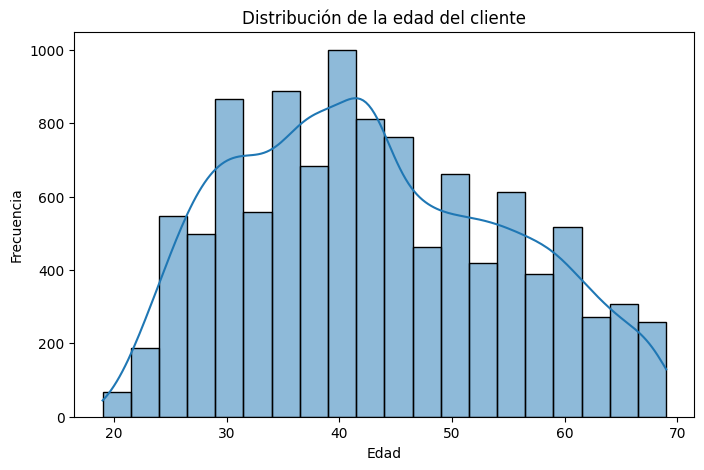

In [1029]:
plt.figure(figsize=(8,5))
sns.histplot(df["edad_cliente"], bins=20, kde=True)
plt.title("Distribución de la edad del cliente")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()


### Distribución del salario del cliente (escala logarítmica)

Debido a la alta dispersión del salario, se utiliza la versión logarítmica
para facilitar la interpretación de la distribución.


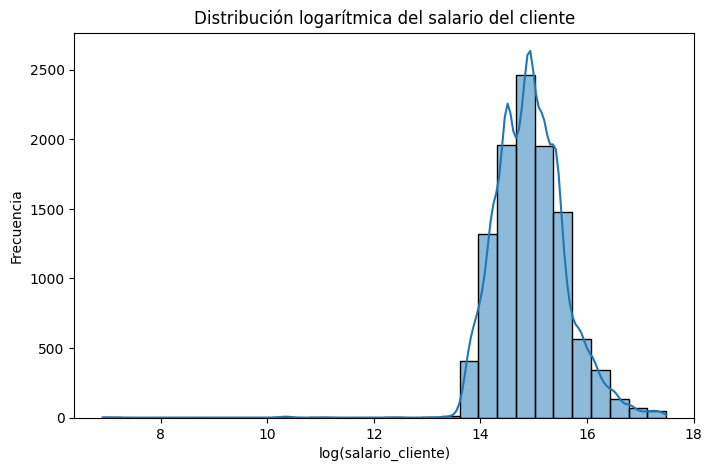

In [1030]:
plt.figure(figsize=(8,5))
sns.histplot(df["salario_cliente_log"], bins=30, kde=True)
plt.title("Distribución logarítmica del salario del cliente")
plt.xlabel("log(salario_cliente)")
plt.ylabel("Frecuencia")
plt.show()


### Distribución del total de otros préstamos (escala logarítmica)

La transformación logarítmica permite visualizar adecuadamente la dispersión
de esta variable altamente asimétrica.


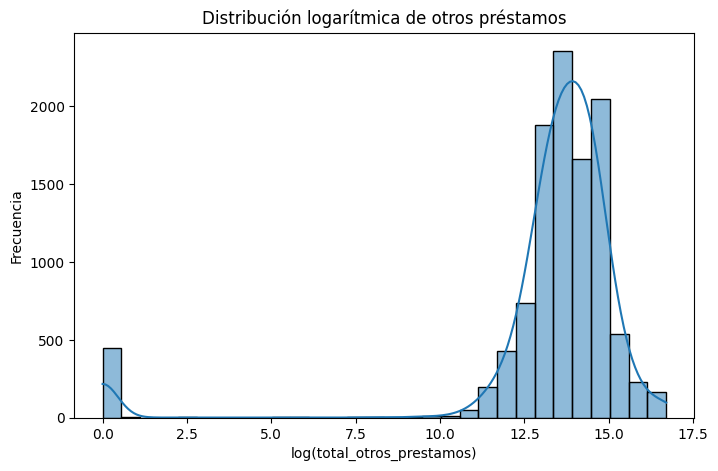

In [1031]:
plt.figure(figsize=(8,5))
sns.histplot(df["total_otros_prestamos_log"], bins=30, kde=True)
plt.title("Distribución logarítmica de otros préstamos")
plt.xlabel("log(total_otros_prestamos)")
plt.ylabel("Frecuencia")
plt.show()


### Cantidad de créditos vigentes

Se utiliza un boxplot para identificar la dispersión y los valores extremos
en una variable de conteo.


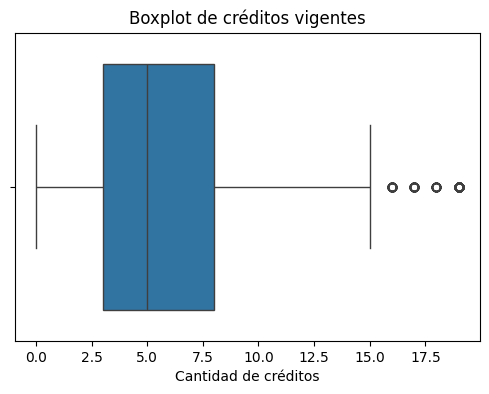

In [1032]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["cant_creditosvigentes"])
plt.title("Boxplot de créditos vigentes")
plt.xlabel("Cantidad de créditos")
plt.show()


### Relación entre edad del cliente y pago a tiempo

Se analiza si existen diferencias en la distribución de la edad
entre clientes que pagan y no pagan a tiempo.


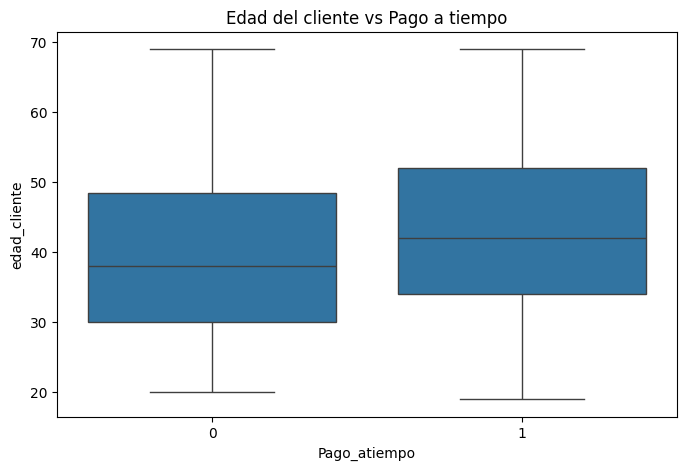

In [1033]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Pago_atiempo", y="edad_cliente", data=df)
plt.title("Edad del cliente vs Pago a tiempo")
plt.show()


### Relación entre salario del cliente y pago a tiempo

Se analiza el salario en escala logarítmica para evaluar diferencias
entre clientes cumplidos y no cumplidos.


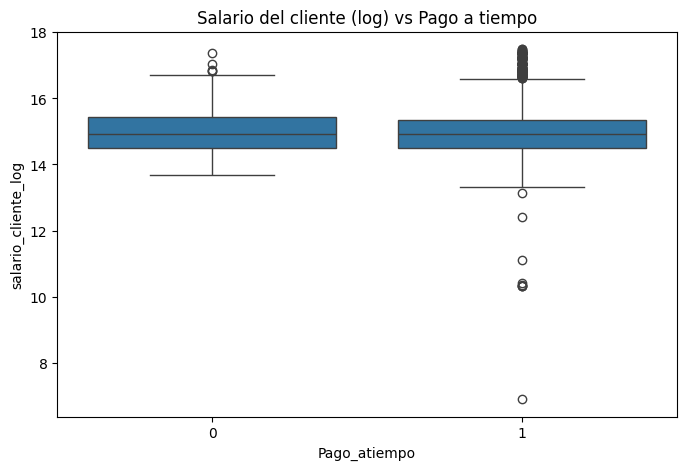

In [1034]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Pago_atiempo", y="salario_cliente_log", data=df)
plt.title("Salario del cliente (log) vs Pago a tiempo")
plt.show()


### Análisis de correlación entre variables numéricas

Se analiza la relación lineal entre variables numéricas luego
del tratamiento de outliers.


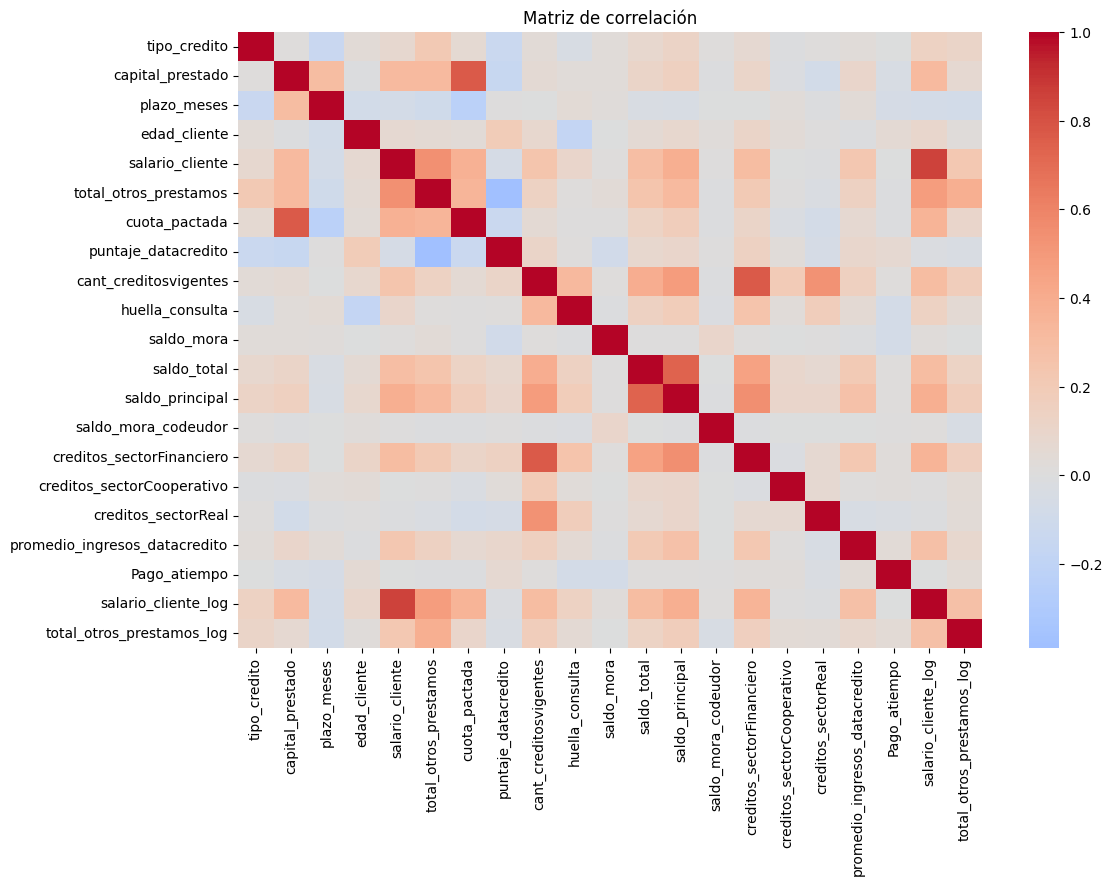

In [1036]:
num_cols = df.select_dtypes(include=np.number)

plt.figure(figsize=(12,8))
sns.heatmap(num_cols.corr(), cmap="coolwarm", center=0)
plt.title("Matriz de correlación")
plt.show()


# Análisis y justificación de la matriz de correlación

## ¿Qué estoy viendo en esta matriz?

En esta matriz de correlación analizo **cómo se relacionan entre sí las variables numéricas** de mi dataset crediticio.  
Cada celda muestra un valor entre **-1 y 1**:

- **Cercano a 1 (rojo intenso):** relación positiva fuerte  
- **Cercano a -1 (azul):** relación negativa fuerte  
- **Cercano a 0 (gris claro):** poca o ninguna relación  

El objetivo principal de esta matriz es:
- Entender **qué variables se mueven juntas**
- Detectar **posible multicolinealidad**
- Justificar **qué variables son relevantes** para el análisis y modelado

---

## Principales conclusiones que obtengo

### 1. Variables financieras están fuertemente relacionadas

Observo una **alta correlación positiva** entre:

- `saldo_total` y `saldo_principal`
- `capital_prestado` y `cuota_pactada`
- `salario_cliente` y `salario_cliente_log`
- `total_otros_prestamos` y `total_otros_prestamos_log`

Esto tiene sentido, ya que:
- El saldo total depende directamente del saldo principal
- A mayor capital prestado, mayor suele ser la cuota
- Las variables en escala logarítmica conservan la relación con su versión original

---

### 2. El comportamiento crediticio se refleja en los saldos

Variables como:
- `cant_creditosvigentes`
- `creditos_sectorFinanciero`
- `creditos_sectorReal`

presentan **correlaciones moderadas** con:
- `saldo_total`
- `saldo_principal`

Esto indica que **a mayor número de créditos activos**, mayor es la exposición financiera del cliente.

---

### 3. El salario influye en la capacidad crediticia

El `salario_cliente` muestra correlaciones positivas con:
- `capital_prestado`
- `cuota_pactada`
- `saldo_principal`

Esto confirma que **los clientes con mayores ingresos suelen acceder a montos más altos**, lo cual es coherente con el negocio bancario.

---

### 4. Variables de riesgo muestran relaciones débiles pero útiles

Variables como:
- `puntaje_datacredito`
- `huella_consulta`
- `saldo_mora`
- `saldo_mora_codeudor`

no presentan correlaciones extremadamente altas, pero sí **relaciones suaves** con saldos y cantidad de créditos.

Esto es positivo, porque:
- Aportan información distinta
- No duplican otras variables
- Son útiles para modelos predictivos

---

### 5. Variable objetivo: `Pago_atiempo`

`Pago_atiempo` no muestra correlaciones fuertes con una sola variable, sino **relaciones débiles y distribuidas**.

Esto indica que:
- El pago puntual **no depende de una única variable**
- Se explica mejor con **un modelo multivariable**, no con reglas simples

---

## ¿Por qué uso variables logarítmicas?

Incluí:
- `salario_cliente_log`
- `total_otros_prestamos_log`

porque:
- Reducen la asimetría de los datos
- Disminuyen el impacto de valores extremos
- Mejoran la estabilidad de los modelos

La matriz confirma que estas variables **mantienen relación con las originales**, pero en una escala más controlada.

---

## Conclusión general

Esta matriz de correlación me permite justificar que:
- El dataset es **coherente desde el punto de vista financiero**
- No existen correlaciones extremas problemáticas (excepto las esperadas)
- Las variables seleccionadas aportan información complementaria
- Es adecuado avanzar hacia modelos de clasificación o scoring crediticio

---


### Conclusiones del análisis exploratorio

- Se identificaron y corrigieron valores atípicos sin eliminar registros.
- Se eliminaron variables irrelevantes y redundantes.
- Se generaron transformaciones que facilitan la interpretación y el modelado.
- El dataset queda preparado para la etapa de selección de variables y modelado.
